import libraries

In [37]:
from dtocs import *
from helper import *
from maps import *
import numpy as np
import matplotlib.pyplot as plt
from rasterData import *
import os


# Split the data 

In [38]:
par_dir = '/Users/aakash/Desktop/MTP2/code'
# w/o roads
# map_data_tif_path = par_dir + '/data/merged_file.tif'
# output_data_dir = par_dir + '/data/tile_data'
# w/ roads
map_data_tif_path = par_dir + '/data/merged_file_w_roads.tif'
output_data_dir = par_dir + '/data/tile_data_roads'

tile_size = 512
SPLIT_DATA = False


if(SPLIT_DATA):
    split_tif_into_tiles(map_data_tif_path, output_data_dir, tile_size)

# Merge According to bounding box

In [53]:
merged_data_path  = par_dir + '/data/temp/file.tif'
# outfile = par_dir + '/data/temp/file2.tif'
# manali (hanuman tibba - manali)
lon1, lat1 = 76.95459234317525,31.801679137058297
lon2, lat2 = 77.02411520084127,31.764177519360725

# bounding box = (left, bottom, right, top)
bounding_box = (lon1, lat2, lon2, lat1)
# bounding_box = (76.98328796870653,31.70144173323603, 77.01350037105028,31.737946830245892)

mergeFiles(output_data_dir, merged_data_path, bounding_box)
# cropBoundingBox(merged_data_path,outfile, bounding_box)
# merged_data_path = outfile
# merge_dem_files(elevation_split_dir, merged_elevation_path, bounding_box)
# merge_dem_files(landcover_split_dir, merged_landcover_path, bounding_box)
resolution = 30

2 files merged


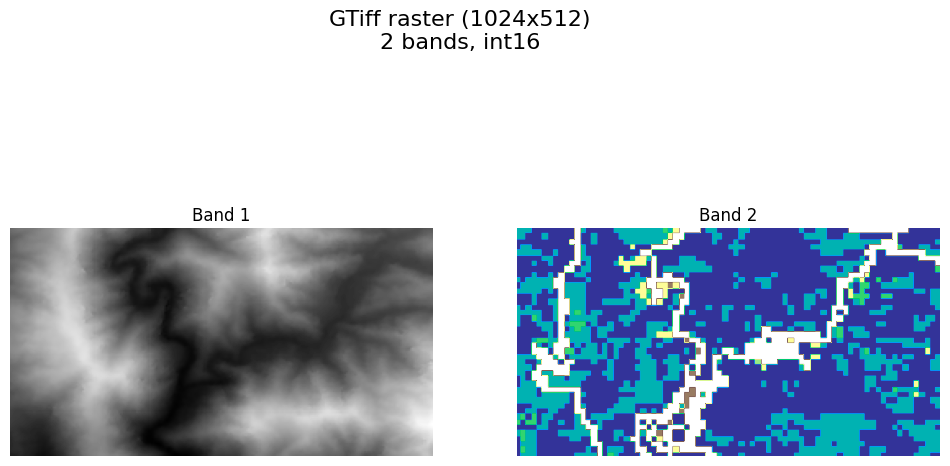

In [40]:
bbox = bounding_box
plot_multiband_raster(merged_data_path,bbox)

# Generate Matrix
- Using GDAL tile interface

In [42]:
map_data, bounds, tf = getDataBoundingBox(merged_data_path, bounding_box)

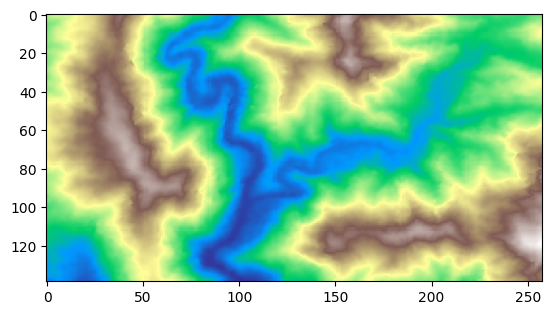

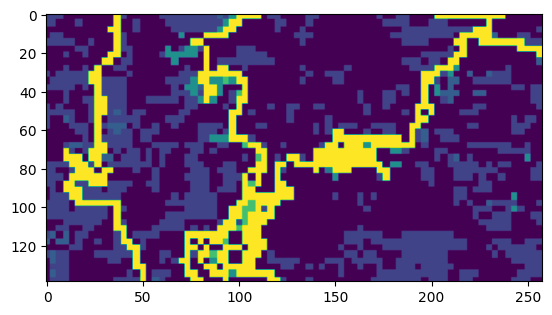

(2, 139, 258)


In [43]:
plt.imshow(map_data[0],cmap='terrain')
plt.show()
plt.imshow(map_data[1])
plt.show()
print(map_data.shape)

In [44]:
print("Elevation Map Info")
print(f"Gray Map Shape: {map_data[0].shape}")
print(f"Min: {map_data[0].min()}")
print(f"Max: {map_data[0].max()}")

Elevation Map Info
Gray Map Shape: (139, 258)
Min: 946
Max: 1780


# Source and Destination

In [54]:
src_lat, src_lon = 31.794790544810002, 76.99715247898794
des_lat, des_lon = 31.776113205607807, 76.98354831486441


src_latIdx,src_lonIdx = findIndexFromCoordinate(bounding_box, map_data[0], src_lon, src_lat)
des_latIdx,des_lonIdx = findIndexFromCoordinate(bounding_box, map_data[0], des_lon, des_lat)

# src_latIdx,src_lonIdx = findIndex(src_lat,src_lon, lat1,lon1, lat2,lon2, resolution)
# des_latIdx,des_lonIdx = findIndex(des_lat,des_lon, lat1,lon1, lat2,lon2, resolution)

In [55]:
print(src_latIdx,src_lonIdx)
print(des_latIdx,des_lonIdx)


25 157
94 107


Dijkstra

In [47]:
# from dijkstra import dijkstraFromSrc, dijkstraFromSrcWithLC, showPathDijkstra
from dijkstra import dijkstraFromSrc, showPath, generatePath, dijkstraFromSrcToRoad

In [56]:
alpha = 0
h_weight = 0.1
slope = 40
# distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, src_latIdx, src_lonIdx, resolution)
# distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, landcover_map, src_latIdx, src_lonIdx,alpha,h_weight,resolution,slope)
distFromSrc, parentMat = dijkstraFromSrc(map_data[0], map_data[1], src_latIdx, src_lonIdx,alpha,h_weight,resolution,slope)

In [49]:
# (des_x, des_y) 
alpha = 0
h_weight = 0.1
slope = 30

distFromSrc, parentMat, (des_latIdx, des_lonIdx) = dijkstraFromSrcToRoad(map_data[0], map_data[1], src_latIdx, src_lonIdx,alpha,h_weight,resolution,slope)


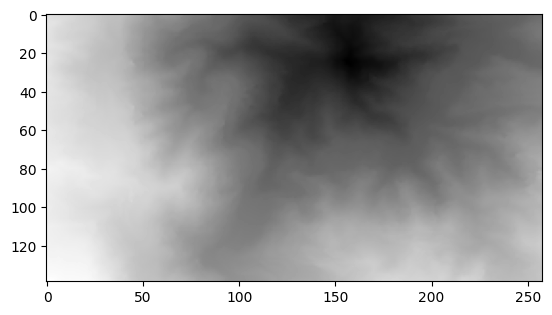

In [57]:
plt.imshow(distFromSrc,cmap='gray')
plt.show()

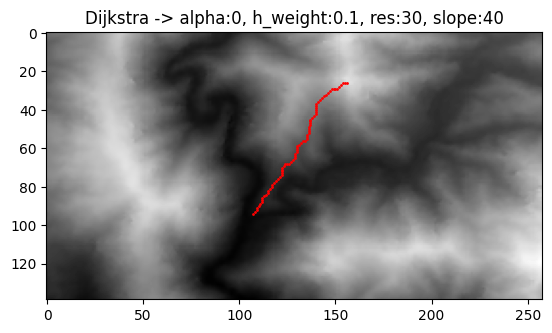

In [58]:
showPath(map_data[0], parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx,alpha,h_weight,resolution,slope)

In [52]:
src = (src_latIdx,src_lonIdx)
des = (des_latIdx,des_lonIdx)
a = generatePath(map_data[0], parentMat,src ,des )